# Задача упаковки кругов в единичный круг
Это двумерная задача упаковки, целью которой является упаковка в единичный круг $n$ равных друг другу кругов радиуса $r$ так, чтобы $r$ был максимальным ($r \to \max$).  
Для удобства вычисления будет упаковка *единичных кругов* в как можно меньший круг радиуса $R$ $(R \to \min)$.  
После всех вычислений всё будет приведено к первоначальному условию.

In [1]:
import numpy as np
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

В **table** представлены значения радиусов малых кругов с сайта [Packomania](http://www.packomania.com/ "Packomania") для первых 30 случаев (1 круг, 2 круга...) и используются для сравнения с данной программой.

In [2]:
table = np.array(
    [1.000000000000000000000000000000, 0.500000000000000000000000000000, 0.464101615137754587054892683012, 
    0.414213562373095048801688724210, 0.370191908158750137702237641058, 0.333333333333333333333333333333, 
    0.333333333333333333333333333333, 0.302593388348611302909204224934, 0.276768653914155215717770973808, 
    0.262258924190165855095630653709, 0.254854701717148909608835737700, 0.248163470571686841544054487132, 
    0.236067977499789696409173668731, 0.231030727971008638446179972284, 0.221172539086390937264316484926, 
    0.216664742924422421010647936933, 0.208679665570499743200080125264, 0.205604646759568224693193969093, 
    0.205604646759568224693193969093, 0.195224011018748878291305694833, 0.190392146849053511968808973057, 
    0.183833026581681677264411480513, 0.180336009254436500349252193252, 0.176939130595961682695732682453, 
    0.173827661421222233359259594413, 0.171580252187166848283936226172, 0.169307931134573046568970317658, 
    0.166252750038606935814942389058, 0.162903649276644353945069772319, 0.161349109064689865167358846536])

В функции **cons** вычисляются ограничения для кругов (все значения массива $d$ должны быть неотрицательными)

In [3]:
def cons(x):
    d = np.array([])
    for i in range(1, 2*n, 2):
        d = np.append(d, (x[0]-1)**2 - x[i]**2 - x[i+1]**2)
    for i in range(1, 2*n, 2):
        for j in range(i+2, 2*n + 1, 2):
            d = np.append(d, (x[i] - x[j])**2 + (x[i+1] - x[j+1])**2 - 4)
    d = np.append(d, x[0] - 1)
    d = np.append(d, n - x[0])
    return d

Функция **fun** создаёт массив из $2n+1$ элементов, где $a[0]$ элемент $-$ радиус $R$, $(a[i],a[i+1]), i=1,3,...2n+1$ $-$ координаты малых кругов.  
После выполнения функции **mininize** идёт приведение к первоначальному условию.  
Всё это выполняется в цикле, т.к. не всегда с первого раза получаются более оптимальные значения радиусов.

In [4]:
def fun(n):
    tmp = 0;
    while (tmp < table[n-1] - 0.001):
        a = np.array([random.uniform(-n,n) for i in range(2*n+1)])
        a[0] = n
        res = minimize(lambda x: x[0], a, constraints=({'type':'ineq','fun': cons}))
        x = res.x / res.x[0]
        x[0] /= res.x[0]
        tmp = x[0]
    draw(n, x)
    print("Разница с табличным значением:", abs(tmp-table[n-1]))
    return

Функция **draw** рисует результат работы программы.

In [5]:
def draw(n, x):
    circle = np.array([])
    fig, ax = plt.subplots()
    plt.xlim(-1.25,1.25)
    plt.ylim(-1.25,1.25)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((0, 0), 1, color='r'))
    for i in range(1, 2*n+1, 2):
        circle = plt.Circle((x[i], x[i+1]), x[0])
        ax.add_artist(circle)
    pass
    return

Разница с табличным значением: 2.220446049250313e-16


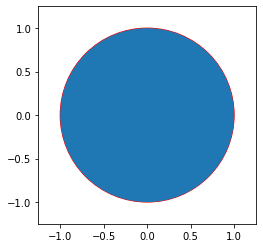

In [6]:
n = 1
fun(n)

Разница с табличным значением: 6.5503158452884236e-15


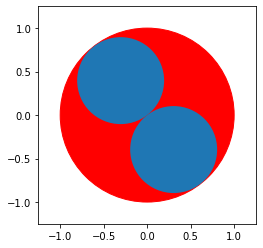

In [7]:
n = 2
fun(n)

Разница с табличным значением: 2.603472992745992e-13


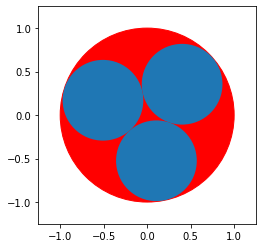

In [8]:
n = 3
fun(n)

Разница с табличным значением: 2.0196710970310505e-09


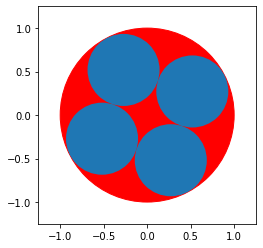

In [9]:
n = 4
fun(n)

Разница с табличным значением: 7.0200670831965795e-09


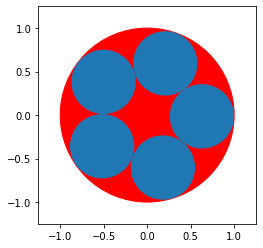

In [10]:
n = 5
fun(n)

Разница с табличным значением: 1.8739026996783537e-10


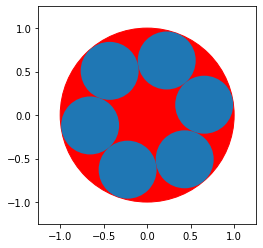

In [11]:
n = 6
fun(n)

Разница с табличным значением: 4.707345624410664e-14


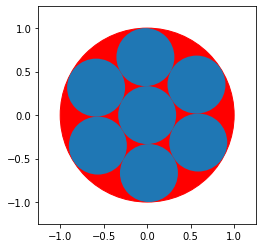

In [12]:
n = 7
fun(n)

Разница с табличным значением: 6.960265697131263e-12


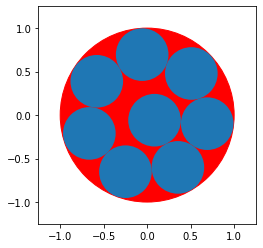

In [13]:
n = 8
fun(n)

Разница с табличным значением: 1.5581980150614072e-13


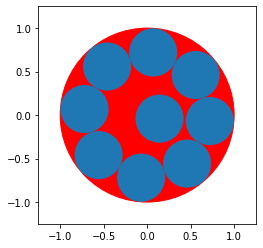

In [14]:
n = 9
fun(n)

Разница с табличным значением: 2.7721713813377846e-12


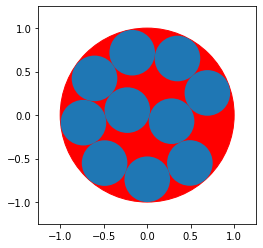

In [15]:
n = 10
fun(n)

Разница с табличным значением: 5.024869409453459e-13


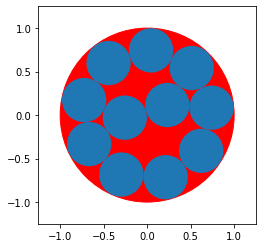

In [16]:
n = 11
fun(n)

Разница с табличным значением: 2.6920937701291336e-11


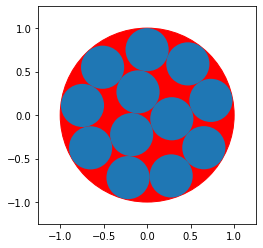

In [17]:
n = 12
fun(n)

Разница с табличным значением: 3.3806291099836017e-14


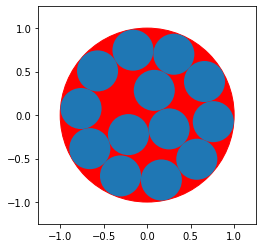

In [18]:
n = 13
fun(n)

Разница с табличным значением: 1.6259152357811502e-10


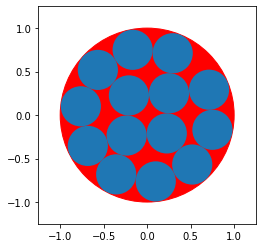

In [19]:
n = 14
fun(n)

Разница с табличным значением: 0.0002873395248400856


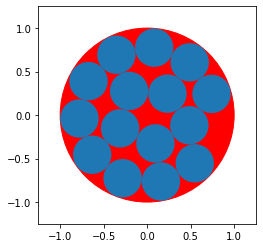

In [20]:
n = 15
fun(n)

Разница с табличным значением: 1.174060848541103e-14


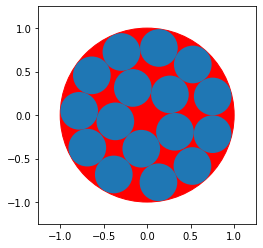

In [21]:
n = 16
fun(n)

Разница с табличным значением: 4.116237019091695e-05


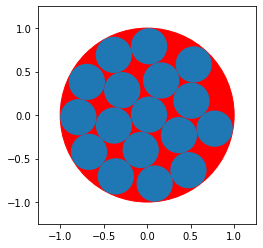

In [22]:
n = 17
fun(n)

Разница с табличным значением: 3.202660359136189e-12


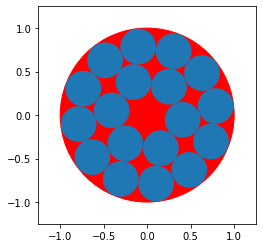

In [23]:
n = 18
fun(n)

Разница с табличным значением: 7.022160630754115e-15


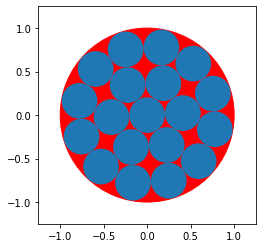

In [24]:
n = 19
fun(n)

Разница с табличным значением: 8.298917109073045e-15


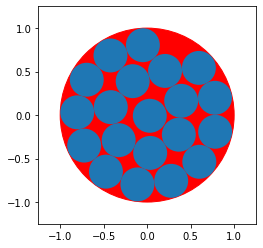

In [25]:
n = 20
fun(n)

Разница с табличным значением: 4.4105724628096254e-10


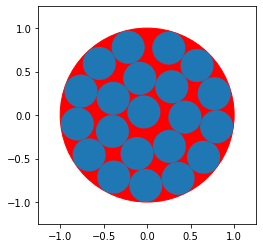

In [26]:
n = 21
fun(n)

Разница с табличным значением: 0.0005392395458520827


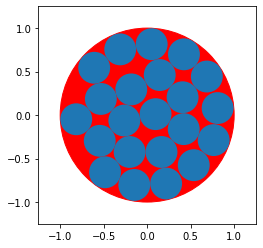

In [27]:
n = 22
fun(n)

Разница с табличным значением: 0.0002907848051438844


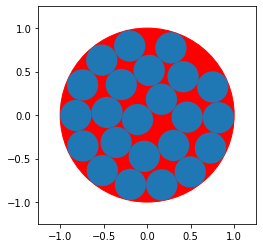

In [36]:
n = 23
fun(n)

Разница с табличным значением: 0.00046274217824965325


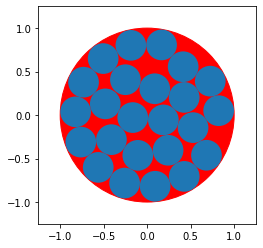

In [29]:
n = 24
fun(n)

Разница с табличным значением: 0.000925629708850545


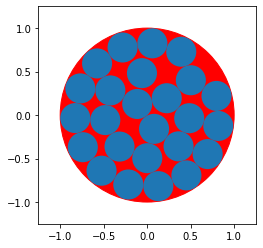

In [30]:
n = 25
fun(n)

Разница с табличным значением: 0.00041233676018856413


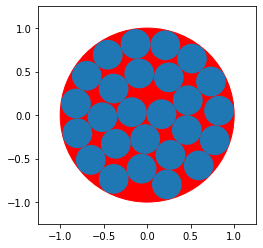

In [31]:
n = 26
fun(n)

Разница с табличным значением: 0.000964808169741288


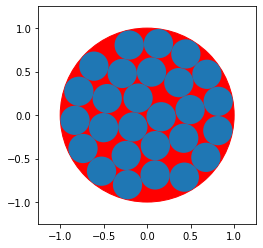

In [32]:
n = 27
fun(n)

Разница с табличным значением: 1.7236792611924345e-05


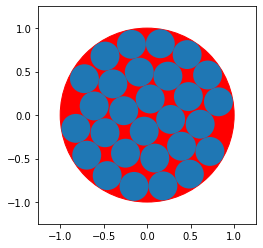

In [37]:
n = 28
fun(n)

Разница с табличным значением: 9.392732245594448e-07


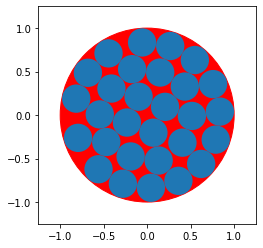

In [34]:
n = 29
fun(n)

Разница с табличным значением: 5.151348511506226e-05


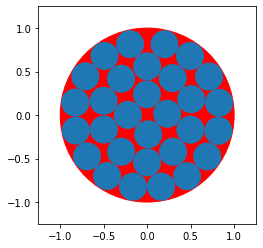

In [35]:
n = 30
fun(n)